## Simple Time Series Visualization and Seasonal Decomposition

In [1]:
# Importing the packages

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data from statsmodels

data = sm.datasets.co2.load_pandas()
co2 = data.data
print(co2.head())

              co2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4


In [3]:
# Indexing the time series data 
# Important : When working with time series data we must always ensure that the dates should be used as index

co2.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

### The dtype = datetime[ns] in the output confirms that the index is made of date stamp objects while length = 2284 and freq = 'W-SAT' shows that we have 2284 weekly date stamps starting on wednesday

In [4]:
y = co2['co2'].resample('MS').mean()
y.head(5)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

In [5]:
# handling missing data: 
# First seeing how much data is missing: 

y.isnull().sum()

5

In [6]:
# The output gives 5 missing values which means 5 months of data is missing
# The missing values can be dropped, filled by fillna() command or rolling mean

y = y.fillna(y.bfill())

In [7]:
# Checking if all the missing values have been filled: 

y.isnull().sum()

0

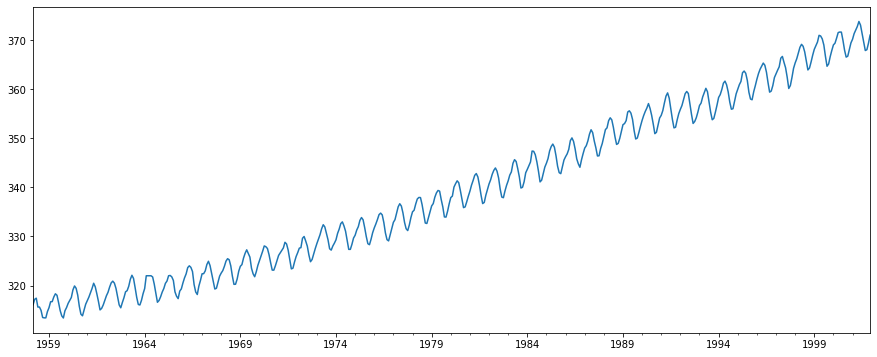

In [8]:
# Visualizing the time series data: 
y.plot(figsize = (15,6))
plt.show()

In [9]:
# Here some distinguishable features appear like seasonality and overall increasing trend

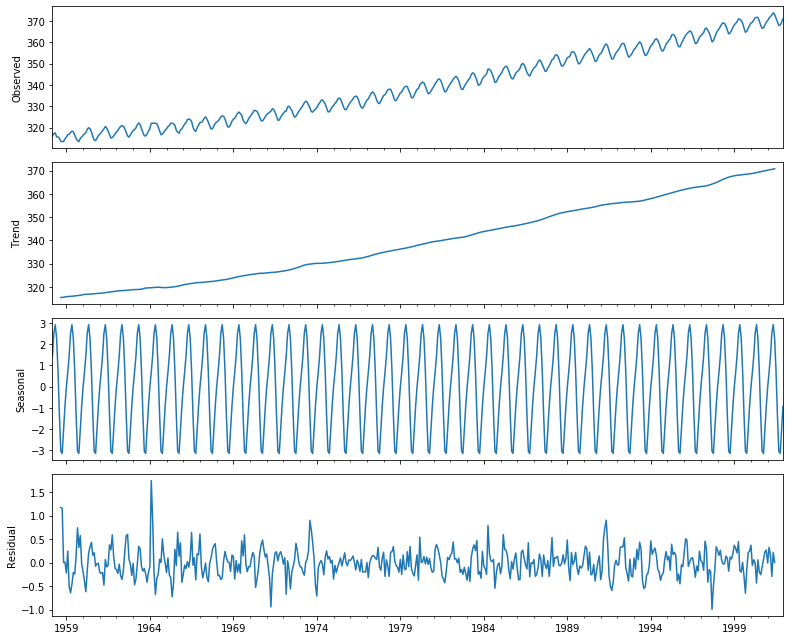

In [10]:
# Statsmodels provides seasonal_decompose function to perform seasonal decomposition
# out of the box

from pylab import rcParams
rcParams['figure.figsize'] = 11,9

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

### Using time series decomposition it is easier to quickly identify a changing mean or variation in the data.